In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import feature_column
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import os
import glob
import cv2
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow_hub as hub
from keras.preprocessing import image

Using TensorFlow backend.


# Set Up MURA Dataset

In [2]:
data_dir = "MURA-v1.1"

train_images_path = pd.read_csv(os.path.join(data_dir, 'train_image_paths.csv'),names=["Train Dataset"])
train_labels = pd.read_csv(os.path.join(data_dir, 'train_labeled_studies.csv'),names=["Train Labeled Studies", "label"])

validation_images_path = pd.read_csv(os.path.join(data_dir, 'valid_image_paths.csv'),names=["Validation Dataset"])
validation_labels = pd.read_csv(os.path.join(data_dir, 'valid_labeled_studies.csv'),names=["Validation Labeled Studies", "label"])

In [3]:
train_images_path = train_images_path.sort_values(by=['Train Dataset'])
train_labels = train_labels.sort_values(by=['Train Labeled Studies'])

validation_images_path = validation_images_path.sort_values(by=['Validation Dataset'])
validation_labels = validation_labels.sort_values(by=['Validation Labeled Studies'])

In [4]:
train_labels['Body Part'] = train_labels['Train Labeled Studies'].apply(lambda x: str(x.split('/')[2])[3:])
train_labels['Study Type'] = train_labels['Train Labeled Studies'].apply(lambda x: str(x.split('/')[4])[:6])

In [5]:
validation_labels['Body Part'] = validation_labels['Validation Labeled Studies'].apply(lambda x: str(x.split('/')[2])[3:])
validation_labels['Study Type'] = validation_labels['Validation Labeled Studies'].apply(lambda x: str(x.split('/')[4])[:6])

## Plot Data Statistics

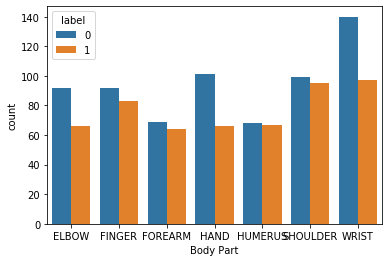

In [6]:
sns.countplot(data=validation_labels, x='Body Part', hue='label')

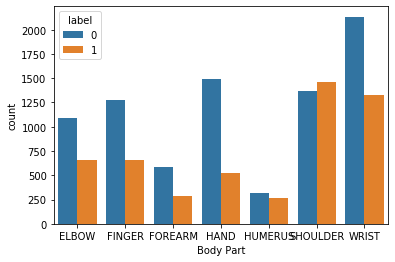

In [7]:
sns.countplot(data=train_labels, x='Body Part', hue='label')

## Read In Training and Validation Data

In [8]:
def get_image_array(image_dir):

    data_path = os.path.join(image_dir,'*g')
    files = glob.glob(data_path)
    data = []
    i=0
    for f1 in files:
        i=i+1
        img = cv2.imread(f1)
        data.append(img)
           
    return data

In [9]:
def load_data(data_dir, limit=None, body_part=None, dataset_type="train"):
    assert (body_part is None) or (type(body_part) == str)
    assert (limit is None) or ((type(limit) == int) and limit >= 0)
    
    train_X, train_y = [], []
    counter = 0
    
    if dataset_type == "train":
        file_path = os.path.join(data_dir, "train_image_paths.csv")
    elif dataset_type == "validation":
        file_path = os.path.join(data_dir, "valid_image_paths.csv")
    
    with open(file_path) as csv_file:
        data = pd.read_csv(csv_file, header=None)
        shuffled_data = data.sample(frac=1)
        
        for index, row in shuffled_data.iterrows():

            # Limit the number of read data examples.
            if limit and counter >= limit: break
            
            # Retrieve data specific to a given body part only.
            if body_part is not None and not body_part.upper() in row[0]: continue
                
            image_path = row[0]
            img = image.load_img(image_path, target_size = (224, 224))
            img = image.img_to_array(img)
            img = np.expand_dims(img, axis = 0)
            #img = img.reshape((1,) + img.shape)

            train_X.append(img)
            train_y.append(label_image(row[0]))

            counter = counter + 1
            
    return np.asarray(train_X), np.asarray(train_y)

In [10]:
def label_image(img_path):
    return 1 if "positive" in img_path else 0

In [11]:
train_X, train_y = load_data("MURA-v1.1", limit=2000, dataset_type="train")
validation_X, validation_y = load_data("MURA-v1.1", limit=1000, dataset_type="validation")

In [12]:
train_X = train_X.reshape(-1, 224, 224, 3) / 255.0
validation_X = validation_X.reshape(-1, 224, 224, 3) / 255.0

In [32]:
for i in range(len(validation_y)):
    print(validation_y[i])

0
1
0
0
1
0
0
0
0
1
0
1
1
1
1
1
0
0
1
1
1
1
0
1
0
1
0
1
0
0
0
0
0
0
0
0
1
1
1
1
0
1
1
1
1
1
0
0
0
0
0
1
0
1
0
1
1
1
1
0
1
0
0
1
1
0
1
0
1
0
1
0
1
0
0
0
0
1
0
1
0
1
0
1
1
1
1
0
1
0
1
0
0
1
0
1
1
0
1
0
0
0
1
1
0
1
0
1
1
0
1
0
1
0
1
1
1
0
0
1
0
1
1
1
0
1
1
1
0
0
1
0
1
0
1
1
1
0
0
0
0
0
1
1
1
0
1
0
0
1
1
1
0
0
1
0
1
1
0
1
1
1
0
0
1
0
1
1
1
1
1
0
0
1
1
1
1
1
1
1
1
0
1
0
0
0
1
1
1
0
0
0
0
1
0
1
0
0
0
0
0
1
0
1
0
0
1
0
1
0
1
0
0
0
1
0
1
0
0
1
0
1
1
1
1
1
0
1
1
1
0
0
0
1
0
0
1
1
0
0
1
1
1
1
0
0
0
0
0
1
0
0
0
1
1
0
0
0
1
0
1
1
0
1
0
1
0
0
1
1
0
1
0
0
1
1
0
0
0
0
0
0
1
0
0
0
0
0
1
1
1
0
1
0
0
1
0
1
1
0
1
0
0
0
0
0
0
1
0
1
1
0
0
1
0
0
0
0
0
1
1
0
1
0
0
0
1
0
0
0
0
0
1
0
1
0
0
0
1
1
0
1
0
0
0
0
1
1
1
1
0
0
0
1
1
1
0
1
1
1
0
0
1
0
0
1
1
0
0
0
1
0
1
0
0
0
1
0
0
1
1
1
0
0
1
1
0
0
1
0
1
1
0
0
1
1
1
1
0
0
1
1
0
1
0
0
0
1
0
0
0
0
0
0
1
1
0
1
0
0
0
0
1
0
0
0
0
0
1
0
1
1
0
0
1
1
0
0
1
0
1
0
0
0
1
1
0
1
1
1
0
0
0
0
1
1
0
1
0
1
0
1
0
1
0
0
0
0
0
1
0
0
0
0
0
0
0
1
0
1
0
1
1
1
0
0
1
1
0
1
0
1
0
1
1
0
1
0
1
0


In [13]:
def show_images(images, cols = 1, titles = None):
    assert((titles is None)or (len(images) == len(titles)))
    n_images = len(images)
    if titles is None: titles = ['Image (%d)' % i for i in range(1,n_images + 1)]
    fig = plt.figure()
    for n, (image, title) in enumerate(zip(images, titles)):
        a = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n + 1)
        if image.ndim == 2:
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
    plt.show()

In [14]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()


In [15]:
#train_images = train_images.reshape(-1, 28 * 28)
print(train_images.shape)
print(train_X.shape)
print(train_y.shape)

(60000, 28, 28)
(2000, 224, 224, 3)
(2000,)


# Inception V1 Model

In [20]:
inception_base_layer = hub.KerasLayer("https://tfhub.dev/google/imagenet/inception_v1/feature_vector/4")

inception_model = tf.keras.Sequential()
inception_model.add(inception_base_layer)
inception_model.add(tf.keras.layers.Flatten())
inception_model.add(tf.keras.layers.Dense(1000, activation='relu'))
inception_model.add(tf.keras.layers.Dropout(0.5))
inception_model.add(tf.keras.layers.Dense(2, activation='softmax'))

inception_model.build([None, 224, 224, 3])  # Batch input shape.
inception_model.compile(optimizer = 'SGD', loss = 'categorical_crossentropy', metrics = ['accuracy'])
inception_model.summary()
history_inception = inception_model.fit(train_X, train_y, epochs=50, batch_size=200, validation_data=(validation_X, validation_y))

#inception_model.evaluate(train_X / 255.0, train_y)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_4 (KerasLayer)   multiple                  5607184   
_________________________________________________________________
flatten_4 (Flatten)          multiple                  0         
_________________________________________________________________
dense_7 (Dense)              multiple                  1025000   
_________________________________________________________________
dropout_2 (Dropout)          multiple                  0         
_________________________________________________________________
dense_8 (Dense)              multiple                  2002      
Total params: 6,634,186
Trainable params: 1,027,002
Non-trainable params: 5,607,184
_________________________________________________________________
Train on 2000 samples, validate on 1000 samples
Epoch 1/50
2000/2000 [==============================] 

KeyboardInterrupt: 

In [ ]:
inception_model.evaluate(validation_X, validation_y)